In [153]:
import jupyter_black

jupyter_black.load()

In [616]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [617]:
with open("./data/data.json", "r") as f:
    data = f.read()

In [618]:
df = pd.DataFrame(
    eval(data.split("[")[1].split("]")[0].replace("\n", "").replace(" ", ""))
)
df.Family = df.Family.astype("category")

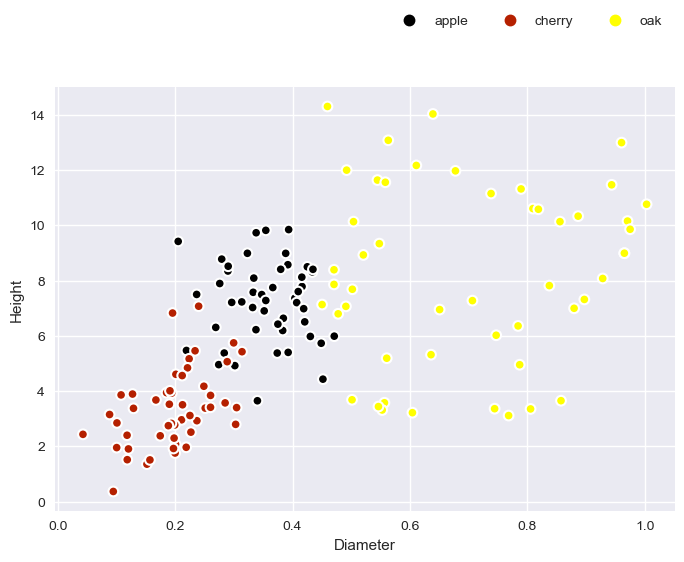

In [157]:
scatter = plt.scatter(
    x=df.Diameter,
    y=df.Height,
    c=df.Family.cat.codes,
    edgecolor="white",
    linewidth=1.5,
    cmap=matplotlib.cm.gnuplot,
)
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=df.Family.cat.categories.values.tolist(),
    bbox_to_anchor=(1, 1.2),
    ncol=3,
)

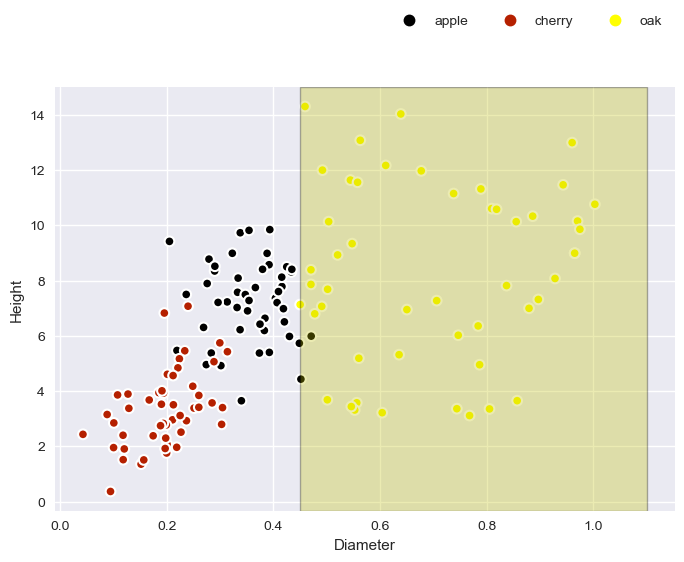

In [188]:
scatter = plt.scatter(
    x=df.Diameter,
    y=df.Height,
    c=df.Family.cat.codes,
    edgecolor="white",
    linewidth=1.5,
    cmap=matplotlib.cm.gnuplot,
)
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.axvspan(0.45, 1.1, alpha=0.3, facecolor="y", lw=1, edgecolor="black")
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=df.Family.cat.categories.values.tolist(),
    bbox_to_anchor=(1, 1.2),
    ncol=3,
)

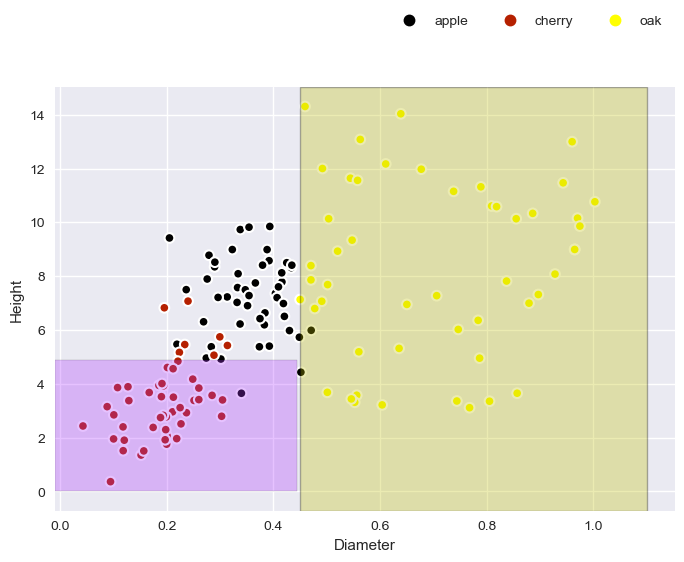

In [196]:
scatter = plt.scatter(
    x=df.Diameter,
    y=df.Height,
    c=df.Family.cat.codes,
    edgecolor="white",
    linewidth=1.5,
    cmap=matplotlib.cm.gnuplot,
)
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.axvspan(0.45, 1.1, alpha=0.3, facecolor="y", lw=1, edgecolor="black")
plt.axhspan(0, 4.88, 0, 0.39, alpha=0.3, facecolor="#ae36ff", edgecolor="black")
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=df.Family.cat.categories.values.tolist(),
    bbox_to_anchor=(1, 1.2),
    ncol=3,
)

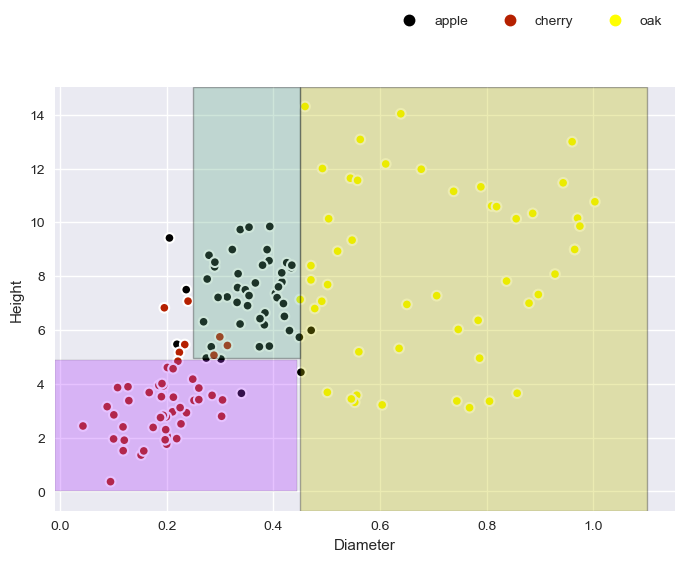

In [226]:
scatter = plt.scatter(
    x=df.Diameter,
    y=df.Height,
    c=df.Family.cat.codes,
    edgecolor="white",
    linewidth=1.5,
    cmap=matplotlib.cm.gnuplot,
)
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.axvspan(0.45, 1.1, alpha=0.3, facecolor="y", lw=1, edgecolor="black")
plt.axhspan(0, 4.88, 0, 0.39, alpha=0.3, facecolor="#ae36ff", edgecolor="black")
plt.axvspan(
    0.25, 0.45, ymin=0.36, alpha=0.3, facecolor="#5eab86", lw=1, edgecolor="black"
)
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=df.Family.cat.categories.values.tolist(),
    bbox_to_anchor=(1, 1.2),
    ncol=3,
)

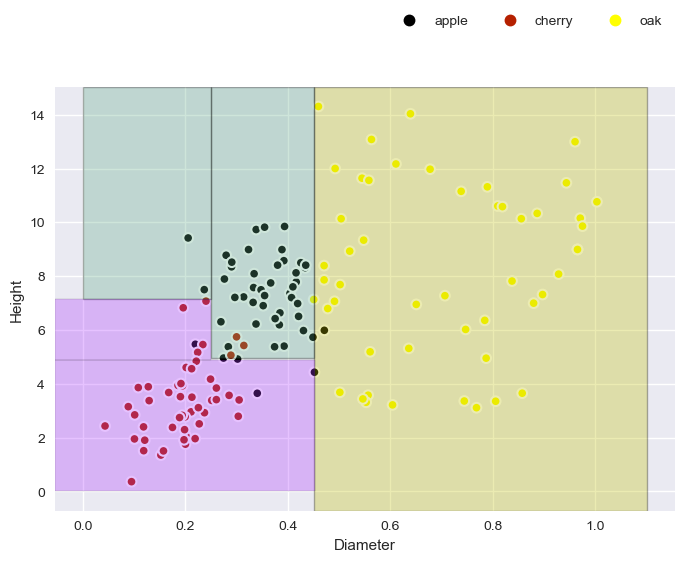

In [244]:
scatter = plt.scatter(
    x=df.Diameter,
    y=df.Height,
    c=df.Family.cat.codes,
    edgecolor="white",
    linewidth=1.5,
    cmap=matplotlib.cm.gnuplot,
)
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.axvspan(0.45, 1.1, alpha=0.3, facecolor="y", lw=1, edgecolor="black")
plt.axhspan(0, 4.88, 0, 0.42, alpha=0.3, facecolor="#ae36ff", edgecolor="black")
plt.axvspan(
    0.25, 0.45, ymin=0.36, alpha=0.3, facecolor="#5eab86", lw=1, edgecolor="black"
)
plt.axvspan(0, 0.25, ymin=0.5, alpha=0.3, facecolor="#5eab86", lw=1, edgecolor="black")
plt.axhspan(4.88, 7.14, 0, 0.252, alpha=0.3, facecolor="#ae36ff", edgecolor="black")
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=df.Family.cat.categories.values.tolist(),
    bbox_to_anchor=(1, 1.2),
    ncol=3,
)

In [251]:
import numpy as np
from math import log, e


def entropy_np(labels, base=None):
    """Computes entropy of label distribution."""
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.0

    base = e if base is None else base

    for i in probs:
        ent -= i * log(i, base)

    return ent

In [401]:
pst_labels = list("bbbbbbbbbbbbbbbbbbbb")
ents = [0]
proportions = [0]
for i in range(len(pst_labels)):
    temp = pst_labels[: i + 1]
    pst_labels[: i + 1] = list("a" * len(temp))
    ent = entropy_np(pst_labels, base=2)
    value, counts = np.unique(pst_labels, return_counts=True)
    probs = counts / len(pst_labels)
    ents.append(ent)
    proportions.append(probs[0])

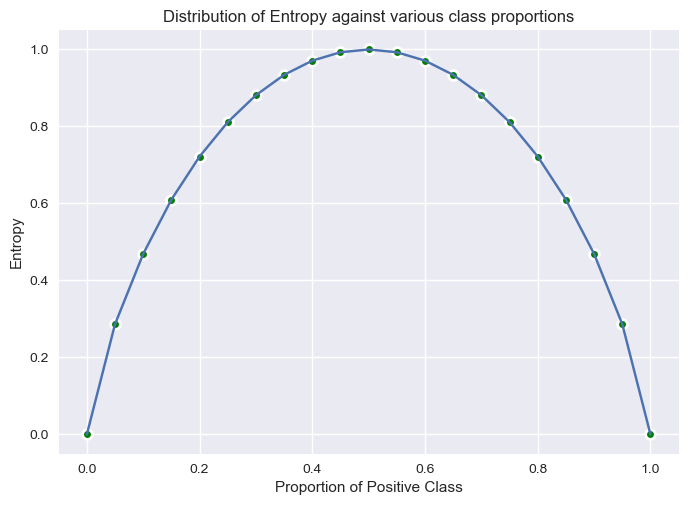

In [406]:
plt.scatter(proportions, ents, c="g", edgecolor="white", lw=2)
plt.plot(proportions, ents)
plt.xlabel("Proportion of Positive Class")
plt.ylabel("Entropy")
_ = plt.title("Distribution of Entropy against various class proportions")

In [661]:
ent_left = []
ent_right = []
info_gain = []
N = df.shape[0]
initial_ent = entropy_np(df.Family, base=2)
splits = np.linspace(0, 1, 150)
for split in splits:
    right = df.loc[df.Diameter >= split].Family
    left = df.loc[df.Diameter < split].Family
    ent_r = entropy_np(right, base=2)
    ent_right.append(ent_r)
    ent_l = entropy_np(left, base=2)
    ent_left.append(ent_l)
    info_weighted = (right.shape[0] / N) * ent_r + (left.shape[0] / N) * ent_l
    info_gain.append(initial_ent - info_weighted)

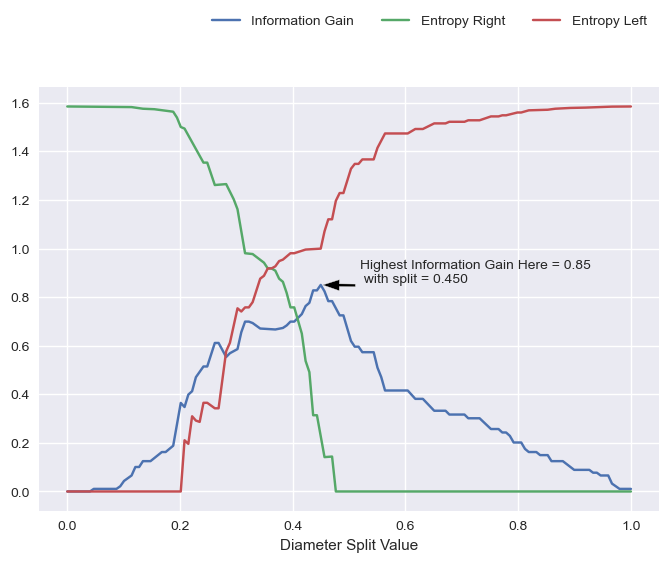

In [662]:
plt.plot(splits, info_gain, label="Information Gain")
plt.plot(splits, ent_right, label="Entropy Right")
plt.plot(splits, ent_left, label="Entropy Left")
plt.xlabel("Diameter Split Value")
plt.annotate(
    f"Highest Information Gain Here = {max(info_gain):.2f} \n with split = {splits[np.argmax(info_gain)]:.3f}",
    (splits[np.argmax(info_gain)], max(info_gain)),
    xytext=(splits[np.argmax(info_gain)] + 0.07, max(info_gain) + 0.01),
    arrowprops=dict(facecolor="black", shrink=0.05, width=2, headwidth=8),
)
plt.legend(bbox_to_anchor=(1, 1.2), ncol=3)

In [584]:
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

tree_classifier = DecisionTreeClassifier(max_depth=4, criterion="entropy")
tree_classifier.fit(df[["Height", "Diameter"]], df.Family.cat.codes)

viz_model = dtreeviz.model(
    tree_classifier,
    X_train=df[["Height", "Diameter"]],
    y_train=df.Family.cat.codes,
    feature_names=["Height", "Diameter"],
    target_name="Family",
    class_names=["apple", "cherry", "oak"],
)

viz_model.view()

C:\Users\PC Klinik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
n_perturp = 3
for i in range(n_perturp):
    sub_smp = df.sample(frac=0.05).iloc[:, :2]
    perturped = np.random.normal(0, 1, (sub_smp.shape[0], 2)) + sub_smp
    new_df = df.copy()
    new_df.iloc[perturped.index, :2] = perturped

    tree_classifier = DecisionTreeClassifier(max_depth=4, criterion="entropy")
    tree_classifier.fit(new_df[["Height", "Diameter"]], new_df.Family.cat.codes)

    viz_model = dtreeviz.model(
        tree_classifier,
        X_train=new_df[["Height", "Diameter"]],
        y_train=new_df.Family.cat.codes,
        feature_names=["Height", "Diameter"],
        target_name="Family",
        class_names=["apple", "cherry", "oak"],
    )

    viz_model.view()

In [679]:
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (
            depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split
        ):
            return True
        return False

    def _entropy(self, y):
        n_labels = len(y)

        if n_labels <= 1:
            return 0

        value, counts = np.unique(y, return_counts=True)
        probs = counts / n_labels
        n_classes = np.count_nonzero(probs)

        if n_classes <= 1:
            return 0

        ent = 0.0

        base = 2

        for i in probs:
            ent -= i * log(i, base)

        return ent

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0:
            return 0

        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (
            n_right / n
        ) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {"score": -1, "feat": None, "thresh": None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split["score"]:
                    split["score"] = score
                    split["feat"] = feat
                    split["thresh"] = thresh

        return split["feat"], split["thresh"]

    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)

    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

In [682]:
tree = DecisionTree(max_depth=4)
tree.fit(df.iloc[:, :2].values, df.loc[:, "Family"].cat.codes.values)
print(tree.root.threshold)

0.4488555701323009
